<a href="https://colab.research.google.com/github/Vshltayade/Machine-Learning/blob/master/ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

print("Imported")

Imported


In [131]:
dataset = pd.read_csv("/content/kc_house_data.csv")

In [132]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [133]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [134]:
dataset = dataset.drop(['id', 'date', 'zipcode', 'lat', 'long', 'sqft_lot15', 'waterfront'], axis = 1)

In [135]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15'],
      dtype='object')

In [136]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800


In [137]:
dataset['price'].corr(dataset['bedrooms'])

0.308349598145638

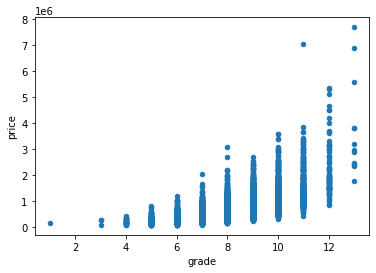

In [138]:
dataset.plot.scatter(x='grade', y='price')

In [139]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [140]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 1.955e+03, 0.000e+00,
        1.340e+03],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 1.951e+03, 1.991e+03,
        1.690e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 1.933e+03, 0.000e+00,
        2.720e+03],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.009e+03, 0.000e+00,
        1.020e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 2.004e+03, 0.000e+00,
        1.410e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.008e+03, 0.000e+00,
        1.020e+03]])

In [141]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [142]:
X[0]

array([3.000e+00, 1.000e+00, 1.180e+03, 5.650e+03, 1.000e+00, 0.000e+00,
       3.000e+00, 7.000e+00, 1.180e+03, 0.000e+00, 1.955e+03, 0.000e+00,
       1.340e+03])

In [143]:
y[0]

221900.0

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, shuffle = False, random_state = 1)

In [145]:
len(X)

21613

In [146]:
len(X_train)

14408

In [147]:
len(X_test)

7205

In [148]:
import statsmodels.api as sm

In [149]:
model = sm.OLS(y_train, X_train).fit()

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              8026.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:46:42   Log-Likelihood:                     -1.9853e+05
No. Observations:               14408   AIC:                                  3.971e+05
Df Residuals:                   14396   BIC:                                  3.972e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.594e+04   2736.089    -13.137      0.000   -4.13e+04   -3.06e+04
x2         -1.469e+04   4355.221     -3.372      0.001   -2.32e+04   -6150.813
x3           129.7717      3.169     40.947      0.000     123.560     135.984
x4            -0.3281      0.046     -7.080      0.000      -0.419      -0.237
x5          1177.9796   5273.002      0.223      0.823   -9157.783    1.15e+04
x6          7.744e+04   2746.398     28.198      0.000    7.21e+04    8.28e+04
x7          5.973e+04   2974.183     20.082      0.000    5.39e+04    6.56e+04
x8          1.032e+05   3020.070     34.181      0.000    9.73e+04    1.09e+05
x9            56.9335      3.233     17.610      0.000      50.596      63.271
x10           72.8382      3.633     20.050      0.000      65.717      79.959
x11         -385.5455     11.051    -34.887      0.000    -407.208    -363.883
x12           79.0848      4.769     16.585      0.000      69.738      88.432
x13           21.4045      4.890      4.377      0.000      11.819      30.990
==============================================================================
Omnibus:                    12303.453   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1168452.009
Skew:                           3.607   Prob(JB):                         0.00
Kurtosis:                      46.523   Cond. No.                     1.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [151]:
predictions = model.predict(X_test)

In [152]:
len(predictions)

7205

In [153]:
predictions[0]

513688.85512731125

In [154]:
y_test[0]

305000.0

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
mean_squared_error(y_test, predictions)

50848331707.143616